# Segmentace obrazu - text a jeho čtení
Cvičení je zaměřené na správné využití osvětlení při nasvícení objektu a následné využití metod pro segmentaci obrazu. Segmentovaný snímek je převeden na text pomocí OCR (optical character recognition).

<img src="images/ocr.png" width="300">

Ke čtení je využita knihovna [**Tesseract OCR**](https://github.com/tesseract-ocr/tesseract).

### Import knihoven a konfigurace

In [1]:
%run ./library.ipynb

### Pomocné funkce
Z následujících funkcí je potřeba vybírat ty vhodné pro splnění úkolu. Parametry a implementaci funkcí si můžete zobrazit pomocí příkazu `help(function_name)` nebo na https://gitlab.fit.cvut.cz/bi-svz/improutils_package/tree/master/improutils.

Seznam funkcí pro přehlednost:

- [`to_gray(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L4)
- [`negative(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L53)
- [`crop(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L99)

- [`rotate(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L184)

- [`segmentation_one_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L56)
- [`segmentation_auto_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L74)
- [`segmentation_two_thresholds(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L90)
- [`segmentation_adaptive_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L109), vysvětlení [použití](https://courses.fit.cvut.cz/BI-SVZ/showroom/adaptive_thresholding/index.html)

- [`find_contours(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/contours.py#L40)
- [`fill_holes(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/contours.py#L74)

- [`filtration_median(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/filtration/filtration.py#L22)

- [`ocr(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/recognition/ocr.py#L7)

- [`cv2.morphologyEx(...)`](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html), vysvětlení [použití](https://courses.fit.cvut.cz/BI-SVZ/showroom/morfologie/index.html)
- [`cv2.dilate(...)`](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html), vysvětlení [použití](https://courses.fit.cvut.cz/BI-SVZ/showroom/morfologie/index.html)
- [`cv2.erode(...)`](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html), vysvětlení [použití](https://courses.fit.cvut.cz/BI-SVZ/showroom/morfologie/index.html)
- [`cv2.minAreaRect(...)`](https://theailearner.com/tag/cv2-minarearect/)
- [`cv2.boxpoints(...)`](https://theailearner.com/tag/cv2-minarearect/)
- [`np.intp(...)`](https://numpy.org/doc/stable/user/basics.indexing.html), Konverze do intu velikosti pointeru.

- `find_holes(...)`, nachází se v souboru *library.ipynb*
- template pro `interact slider`, jenž můžete (ale nemusíte) použít při segmentaci, je také v souboru *library.ipynb*

---

### Úkoly

1. Změřte velikost placky s nápisem FIT v pixelech - výška, šířka.

1. Zvolte vhodné funkce pro segmentaci obrazu a přečtěte text z obrázku snímaném kamerou. Po vyladění algoritmu, využijte předzpracovaný obrázek a nechte ho přečíst OCR. V případě, že výsledek bude po porovnání `True`, úkol jste splnili.

Pro každý z úkolů je nutné zvolit vhodný typ osvětlení a následně placku nasnímat monochromatickou kamerou. Na každý úkol bude v ideálním případě potřeba jiný snímek. Volba vhodného nasvícení usnadní algoritmickou část úkolu. Při špatné volbě osvětlení nebude úkol uznán!

Pro volbu vhodné iluminační techniky a vhodného osvětlení můžete konzultovat přehledový dokument [Volba vhodného osvětlení v kombinaci s kamerou](https://courses.fit.cvut.cz/BI-SVZ/showroom/illumination/index.html), nebo  přednášku [Kamerový systém a zpracování obrazu](https://courses.fit.cvut.cz/BI-SVZ/lectures/files/bi-svz-03-kamerovy-system-a-zpracovani-obrazu.pdf).

#### 1) Nasnímejte placky s nápisem FIT a zobrazte.
Snímky uložte do jedné složky. Použijte vhodné osvětlení!

Celkem nalezených obrázků: 2


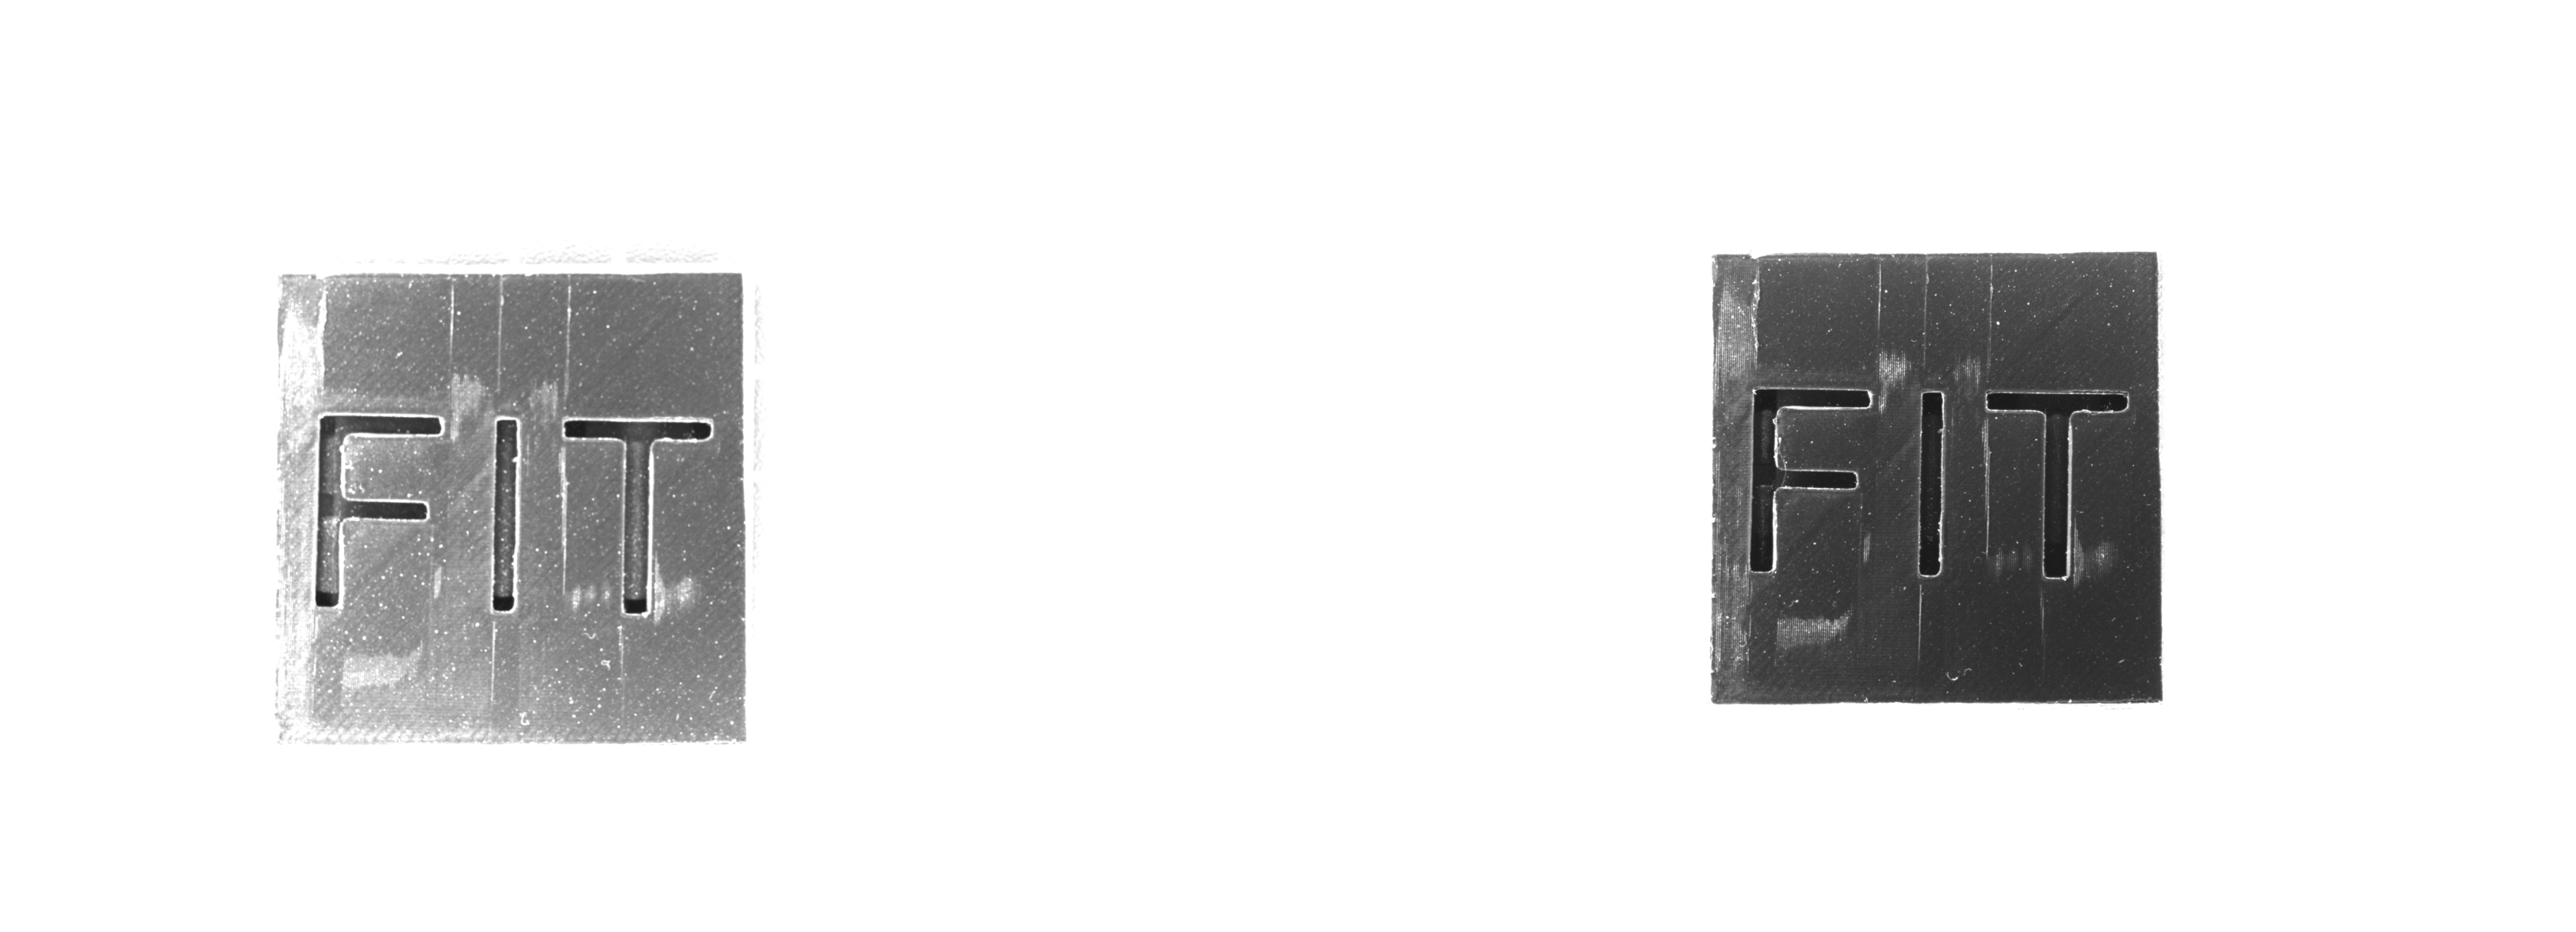

In [38]:
path = 'img/' ### nezapomeňte cestu zakončit '/'
files = os.listdir(path)

images = []

for f in files:
    image = load_image(path + f) ### načtěte obrázek
    images.append(image)
        
print('Celkem nalezených obrázků: ' + str(len(images)))
plot_images(*images) #zobrazte snímky

#### 2) Změřte rozměry placky v pixelech

Úkolem je ze snímku segmentovat placku a změřit její rozměry - výška, šířka v pixelech.

Rozměry jsou vykresleny do původního snímku viz. obrázek. Pro pozicování textu a obrysu placky využijte znalost kontury, ze které byly hodnoty vypočítány.

<img src="images/measures_ref.png" width="300">

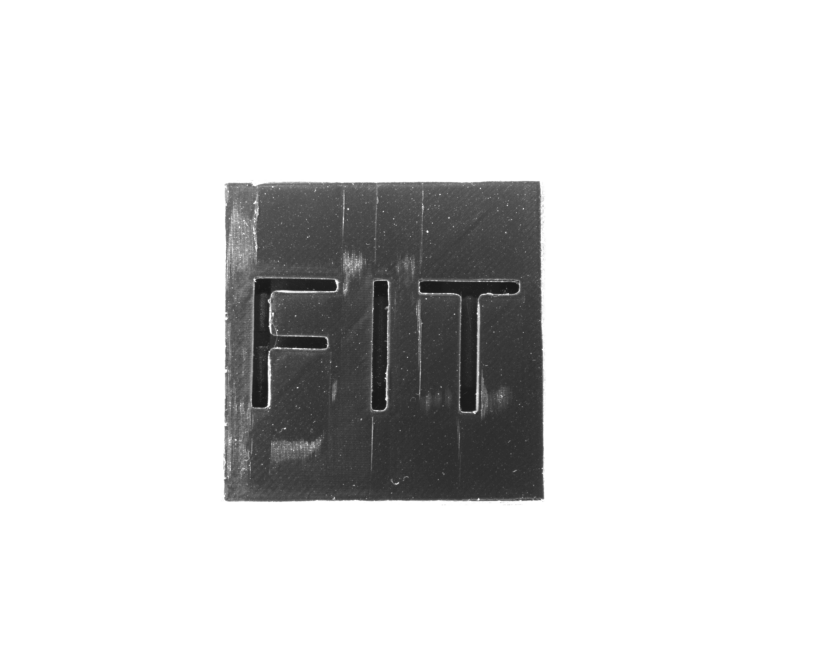

In [10]:
img_g = to_gray(images[0])
plot_images(img_g)

In [36]:
def measurement_algorithm(img):
    
    ### algoritmus segmentace a měření placky
    mask = segmentation_two_thresholds(img_g, 0, 250)
    # plot_images(mask)

    _, num_contours, contours = find_contours(mask, external=False)

    threshold = 540
    contours =  [c for c in contours if cv2.contourArea(c) > threshold]

    print(f'Pocet kontuyr: {len(contours)}')

    contour_drawn = cv2.drawContours(img.copy(), contours, -1, color=(255, 0, 0 ), thickness=10)
    plot_images(contour_drawn)
    
    rect = cv2.minAreaRect(contours[0])
    height, width = rect[1]
    print(f"h: {height}, w: {width}")
    
    sizes_drawn = img.copy()
    points = cv2.boxPoints(rect).astype(np.int) ###

    cv2.line(sizes_drawn, points[0], points[1], color=(255, 0, 0), thickness=3)
    cv2.putText(sizes_drawn, "{:.2f} px".format(width), points[0], 0, 1.5, (0, 0, 255), 2)
    
    cv2.line(sizes_drawn, points[1], points[2], color=(255, 0, 0), thickness=3)
    cv2.putText(sizes_drawn, "{:.2f} px".format(height), points[2], 0, 1.5, (0, 0, 255), 2)

    return mask, sizes_drawn

Pocet kontuyr: 1
h: 1011.7860107421875, w: 1011.29736328125


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


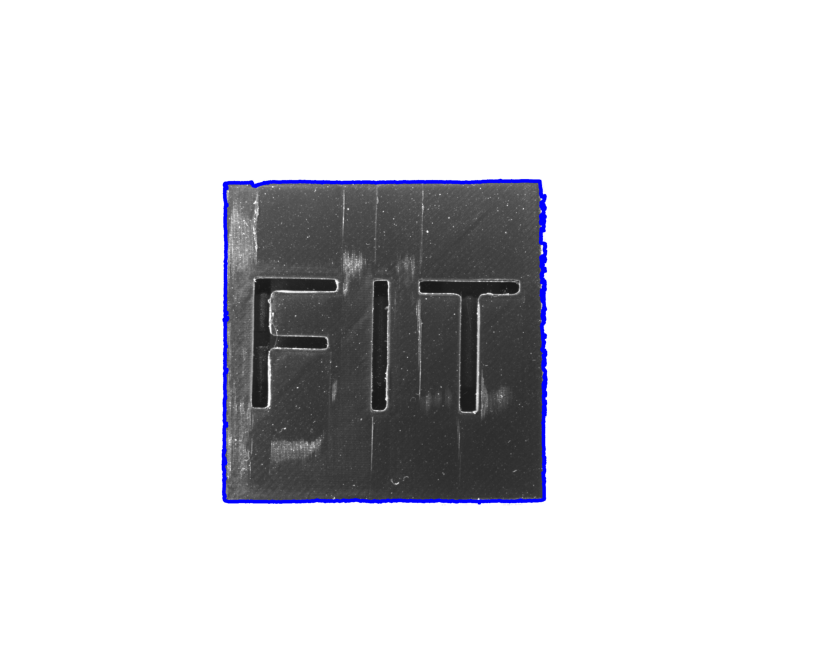

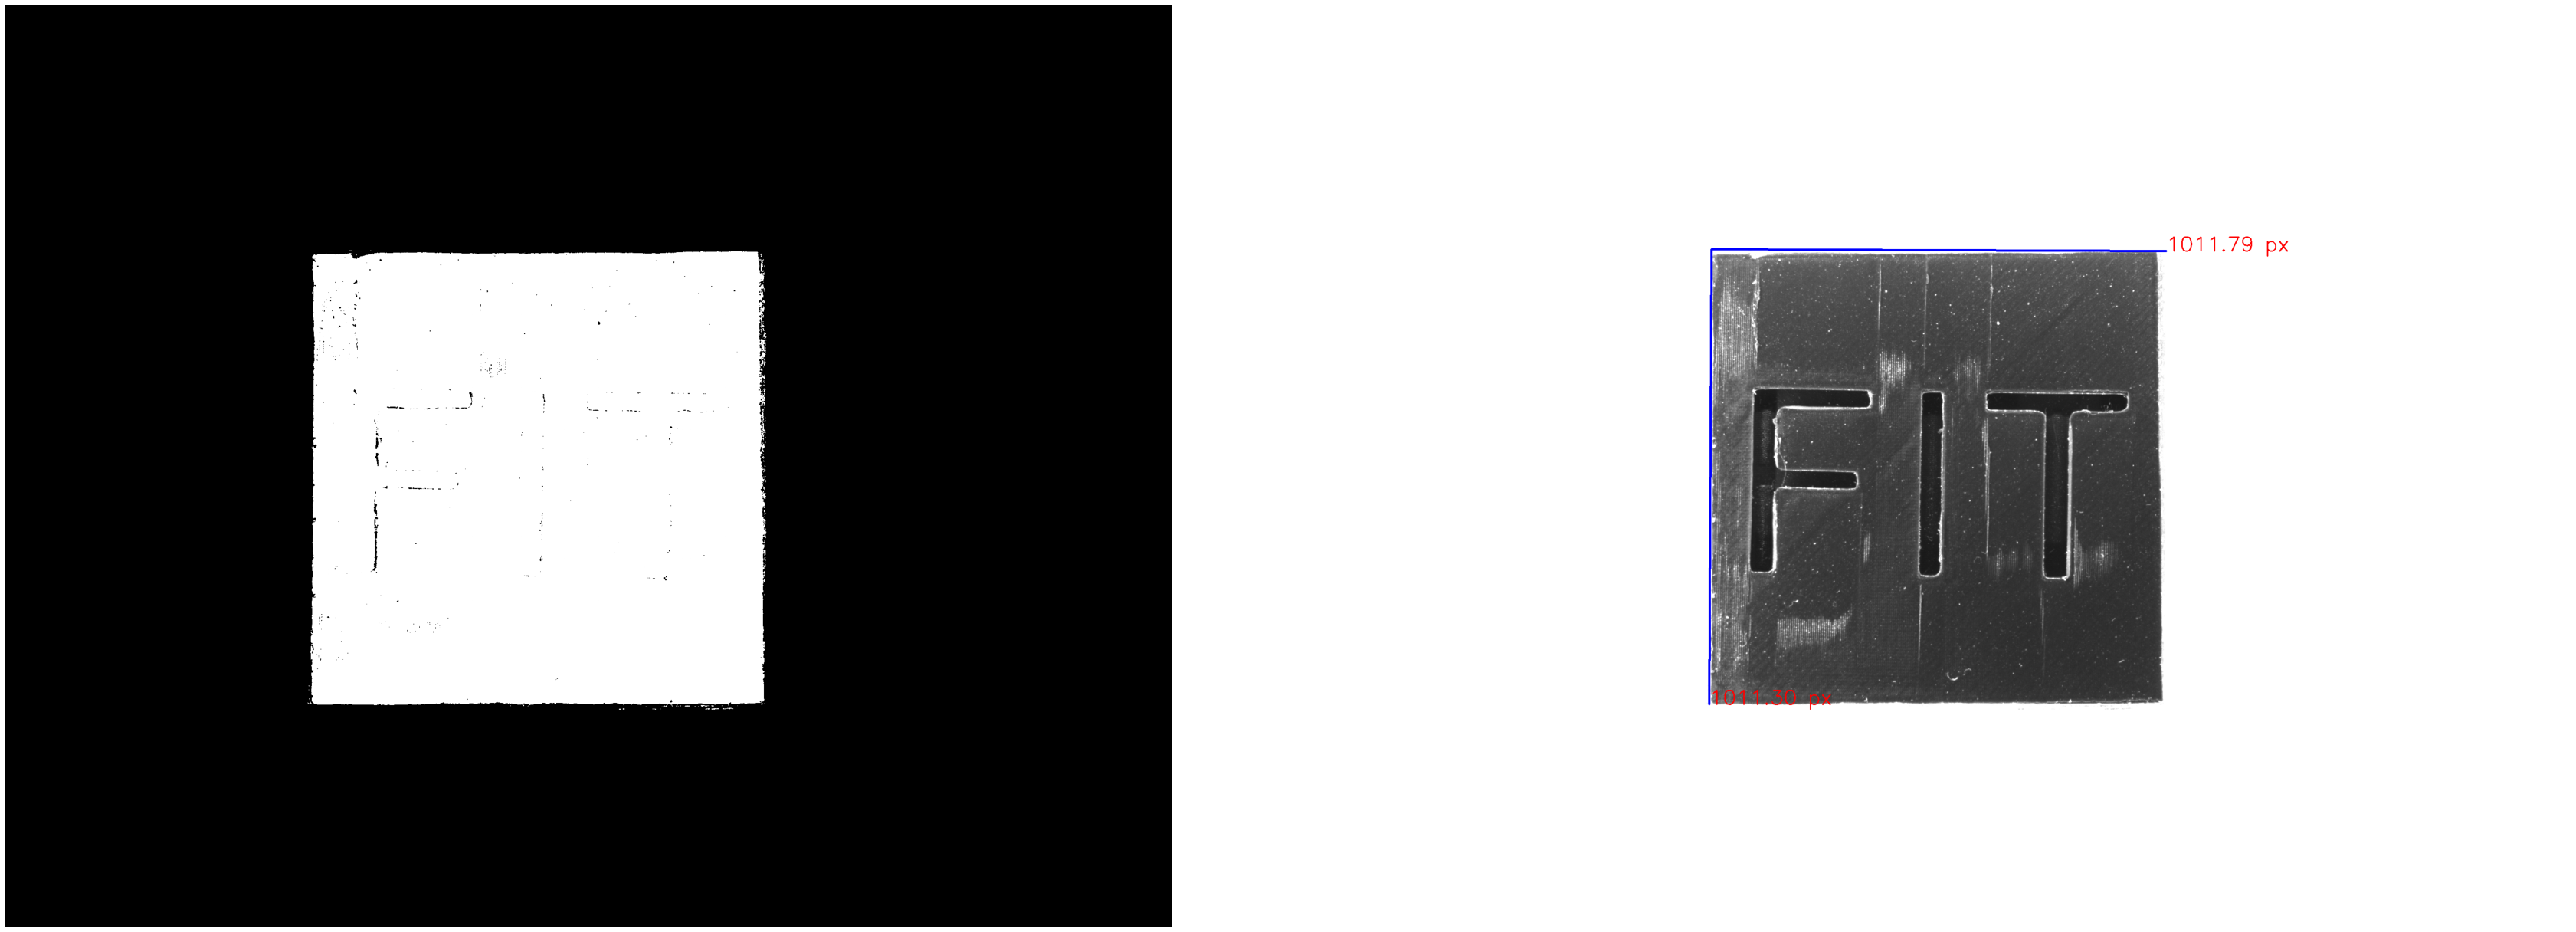

In [37]:
img_measures = images[1]  ### doplňte index
mask, sizes_drawn = measurement_algorithm(img_measures)
plot_images(mask, sizes_drawn)

#### 3) Doplňte algoritmus pro segmentaci textu z nasnímaných placek.
Výstupem algoritmu by měl být binární obraz, kde pozadí má černou barvu a objekty (popředí) bílou. Binární obrázek zobrazte.

In [163]:
def segmentation_algorithm(img):
    
    ### algoritmus segmentace textu 
    img = to_gray(img)
    
    img = crop(img, 750, 800, 1700, 1500)
    
    ### algoritmus segmentace a měření placky
    mask = segmentation_two_thresholds(img, 107, 255)
    mask = fill_holes(mask)
    # plot_images(mask)
    
    contour_drawn, num_contours, contours = find_contours(mask, 11000, 500000, external=False)

    print(f'Pocet kontuyr: {len(contours)}')

    # contour_drawn = cv2.drawContours(img.copy(), contours, -1, color=(255, 0, 0 ), thickness=10)
    plot_images(contour_drawn)
    
    return img

Pocet kontuyr: 4


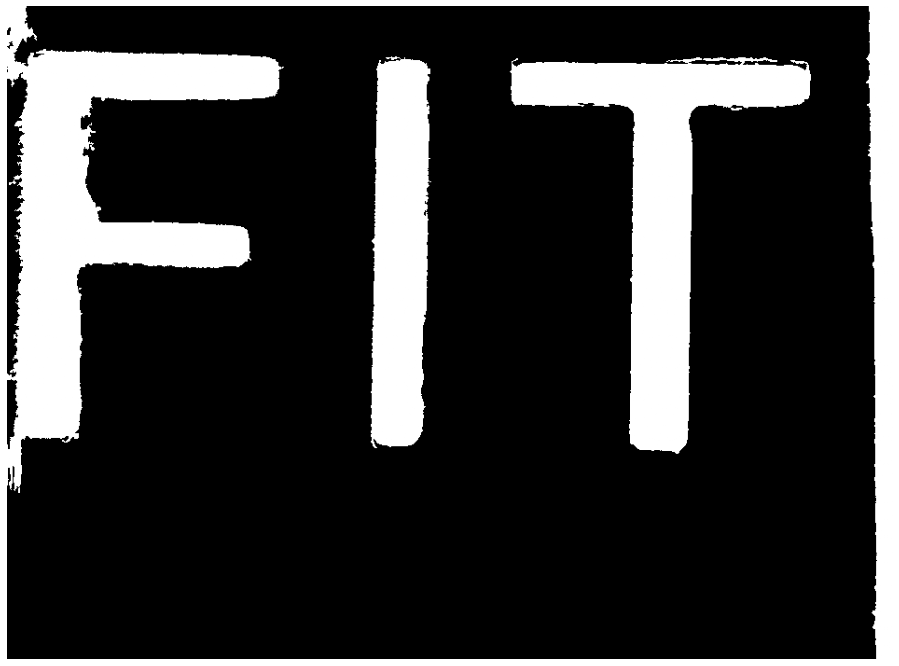

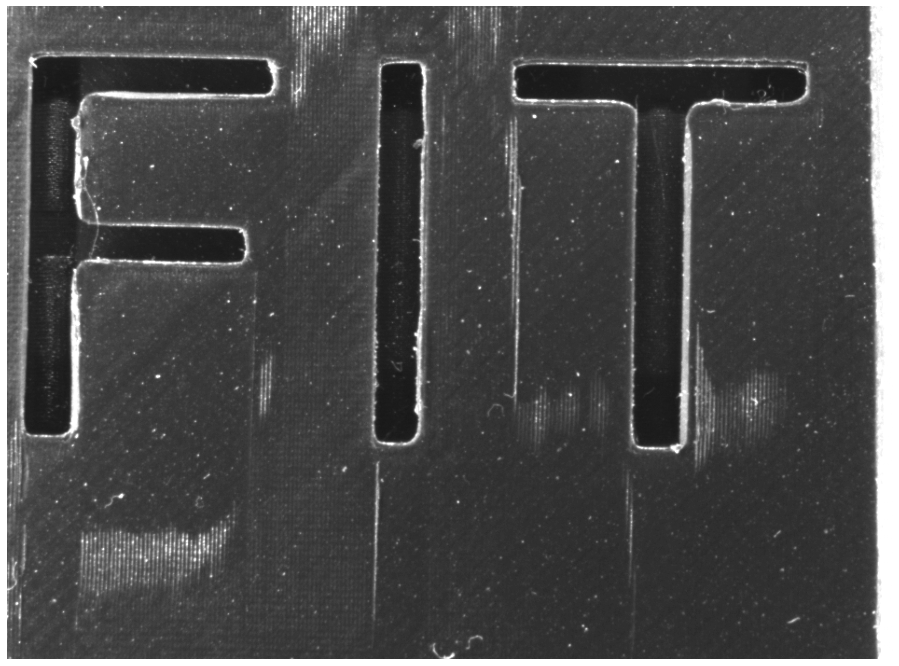

In [164]:
img_text = images[1] ### doplňte index
img_bin = segmentation_algorithm(img_text)
plot_images(img_bin)

#### 4) Využijte funkční algoritmus na snímky.
**POZOR:** Dokud nebude vstupní obraz vypadat následovně, **NEPOUŠTĚJTE** se do další části. 

<img src="images/fit_preprocessed.png" width="200">

#### 5) Využijte OCR na výsledný binární obrázek a zkontrolujte správnost.
**Hint:** Pokud se požadovaný výstup OCR neshoduje s referenčním textem, zařiďte aby nebyl text na obrázku nijak rotován a kolem textu byl alespoň 20px rámeček. Důvodem je použití Tesseract OCR, jenž je na dané věci velice náchylný.

In [165]:
text = ocr(img_bin) ###
ref_text = 'FIT'

print('Přečtený text je: ' + "'" + text.strip() + "'\n")
if text.strip() == ref_text:
    print('-> Úkol jste splnili!\n')
else:
    print('-> Úkol je třeba dál ladit ...')    
print('')


Přečtený text je: 'zion RE RS

yn be = Fede rs

4 J Je »
Bi : A | :
$ fori ; ; ) 04TH

J. fi | Se

1 ; -'

-> Úkol je třeba dál ladit ...



### 6) Bonusová část - změřte rozměry kostičky v milimetrech

Změřte a zobrazte rozměry placky v milimetrech, když víte že výška písmena I je 18 mm.